In [1]:
import numpy as np
from scipy.sparse import csr_matrix, kron, eye
import scipy.sparse.linalg as las
import scipy.linalg as la
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [2]:
I = csr_matrix(np.array([[1, 0], 
                         [0, 1]]))
X = csr_matrix(np.array([[0, 1], 
                         [1, 0]]))
Y = csr_matrix(np.array([[0, -1j], 
                         [1j, 0]]))
Z = csr_matrix(np.array([[1, 0], 
                         [0, -1]]))

In [3]:
# setting up main parameters of the model


# number of spins in the chain
L  = 10
# number of steps in the grid of longitudinal field values
D  = 201
# grid of transverse field values
ta = np.linspace(0,2,D)

In [4]:
# this function returns a quantum many-body Hamiltonian of the transverse field Ising model
def Ham(L=3, ta = 0.):
    if L == 2:
        return - kron(Z,Z) - ta * ( kron(X,I) + kron(I,X) )
    else:
        Lm1 = eye(2**(L-1))
        Lm2 = eye(2**(L-2))
        return kron(Ham(L-1,ta),I) - kron(Lm2,kron(Z,Z)) - ta * kron(Lm1,X)

In [5]:
# this function returns x value of spin i (i \in [1,L]) in a chain of size L in the "state" state
def z_magnetization(L,i,state):
    if i == 1:
        return state.T @ kron(Z,eye(2**(L-1))).toarray() @ state
    if i == L:
        return state.T @ kron(eye(2**(L-1)),Z).toarray() @ state
    else:
        return state.T @ kron(kron(eye(2**(i-1)),Z),eye(2**(L-i))).toarray() @ state

In [6]:
def average_chain_z_magnetization(L,state):
    tmp = 0
    for i in range(1,L+1):
        tmp += z_magnetization(L,i,state)
    return tmp/L

In [7]:
%%time
av_z_magnetizations = []
for i in tqdm(range(D)):
    state = las.eigsh(Ham(L, ta[i]), k=1023)[1][:,0]
    av_z_magnetizations = np.append(av_z_magnetizations, average_chain_z_magnetization(L,state))

100%|██████████| 201/201 [10:46<00:00,  3.22s/it]

CPU times: user 14min 2s, sys: 20.5 s, total: 14min 22s
Wall time: 10min 46s


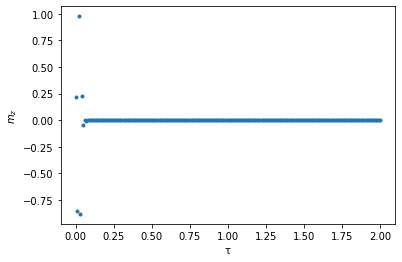

In [8]:
plt.plot(ta,av_z_magnetizations,'.')
plt.xlabel('τ')
plt.ylabel('$m_z$')
plt.show()

In [9]:
z_susceptibility=[]
for i in range(D-1):
    z_susceptibility.append((av_z_magnetizations[i+1]-av_z_magnetizations[i])/(ta[1]-ta[0]))

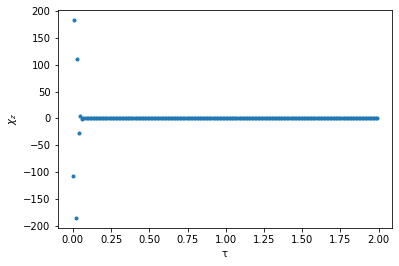

In [10]:
plt.plot(ta[:-1],z_susceptibility,'.')
plt.xlabel('τ')
plt.ylabel('$\chi_z$')
plt.show()